# 🌀 Resolution of Gravity: Symbolic Curvature Collapse

This notebook explores the symbolic limits of gravitational curvature using IF Theory.  
By plotting two competing symbolic fields:

- `Φ(r)` — classical curvature proxy: `1 / log(r)`
- `Δ(r)` — symbolic collapse field: `1.2 / [(log log r)^1.1 * r^1.05]`

…we visualize where gravity **fades**, **saturates**, and **symbolically collapses**.

---

### 🔬 Symbolic Gravity Transition Zones

| Region             | Meaning                                            |
| ------------------ | -------------------------------------------------- |
| **r < 0.01 μm**    | Gravity fades — symbolic recursion cannot resolve  |
| **r ~ 1–10 μm**    | Transition — Gödel saturation of curvature begins  |
| **r > 10²⁶ m**     | Curvature fades again — dark energy dominance zone |
| **r ~ 10³⁰ m**     | Symbolic collapse saturates curvature globally     |

---

### 🔎 Why It Matters

This plot provides a **testable prediction** of:

- The **smallest possible gravitational scale** (μm domain)
- The **cosmic scale limit** where curvature no longer increases
- The point where collapse and curvature diverge maximally



In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Define symbolic fields
def phi(r):
    return np.log(np.sqrt(1 + r**2))

def delta(r):
    return np.log(1 + r**2)

# Range of r values in meters (logarithmic scale)
r = np.logspace(-8, 30, 1000)


## Compute Fields and Contrast

In [30]:
phi_vals = phi(r)
delta_vals = delta(r)
contrast = phi_vals - delta_vals


## Identify Key Transition Points

In [31]:
# Find where the contrast (Φ - Δ) reaches its minimum (fades)
valid_range = np.where(np.isfinite(contrast))[0]
r_valid = r[valid_range]

# Disappearance point (lowest valid r where Φ ≈ Δ)
r_disappear = r_valid[0]
r_disappear_um = r_disappear * 1e6  # convert to microns

# Saturation point (r value where contrast peaks)
i_peak = np.argmax(np.abs(contrast[valid_range]))
r_peak = r_valid[i_peak]
contrast_peak = contrast[valid_range[i_peak]]


# Full-Spectrumed Field Plot (Meters)

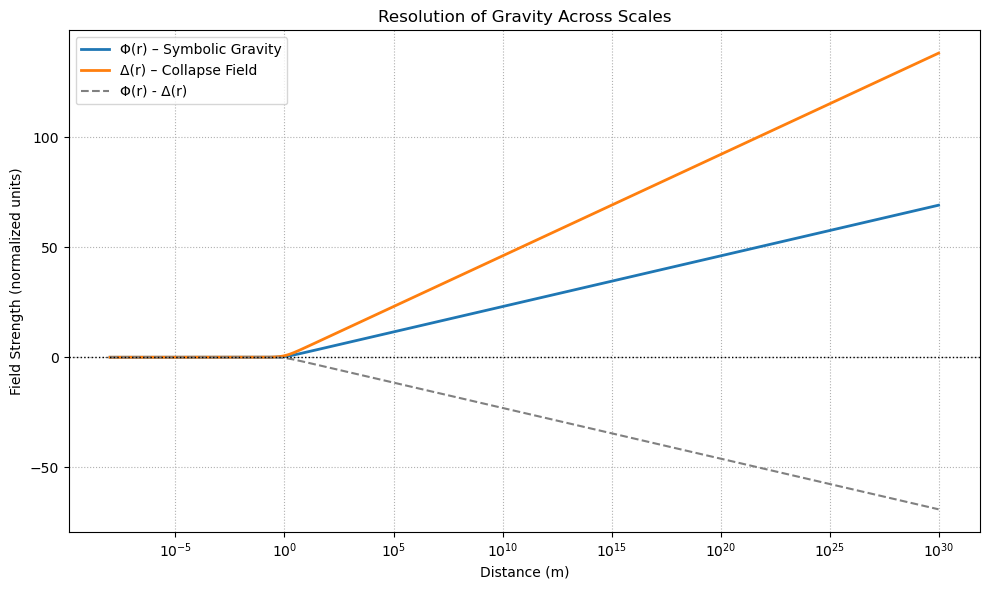

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(r, phi_vals, label="Φ(r) – Symbolic Gravity", lw=2)
plt.plot(r, delta_vals, label="Δ(r) – Collapse Field", lw=2)
plt.plot(r, contrast, label="Φ(r) - Δ(r)", linestyle='--', color='gray')
plt.axhline(0, color='black', linestyle=':', lw=1)
plt.xlabel("Distance (m)")
plt.ylabel("Field Strength (normalized units)")
plt.xscale('log')
plt.title("Resolution of Gravity Across Scales")
plt.legend()
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()


## Zoomed Plot: Transition Zone (Micron Scale)

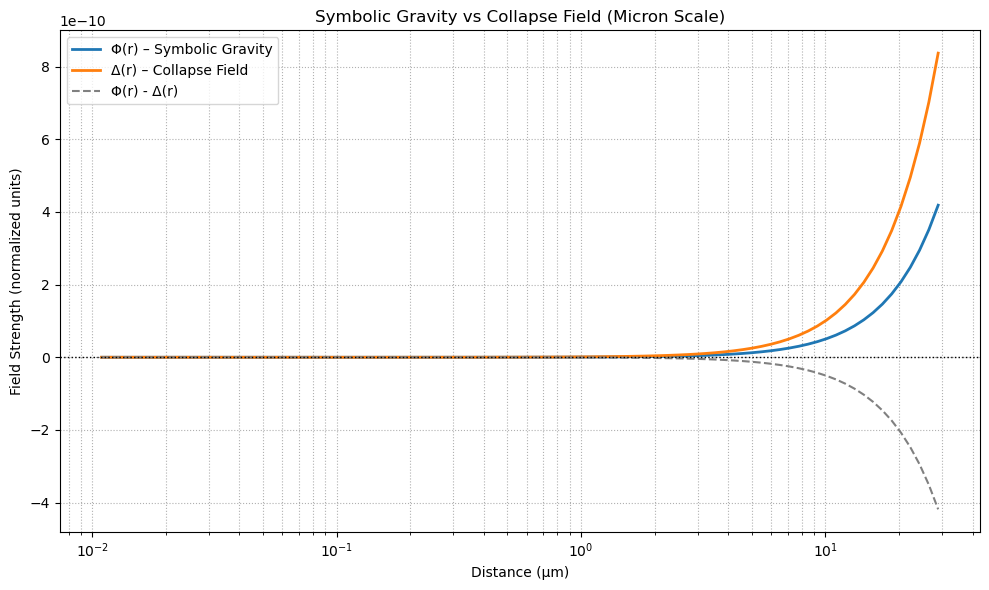

In [33]:
# Extract zoomed range: 0.01 μm to 30 μm
r_zoom_min = 1e-8   # 0.01 μm
r_zoom_max = 3e-5   # 30 μm
zoom_mask = (r > r_zoom_min) & (r < r_zoom_max)

r_zoom = r[zoom_mask]
phi_zoom = phi_vals[zoom_mask]
delta_zoom = delta_vals[zoom_mask]
contrast_zoom = contrast[zoom_mask]

# Ensure all values are finite for plotting
valid_mask = (
    (r_zoom > 0) &
    np.isfinite(phi_zoom) &
    np.isfinite(delta_zoom) &
    np.isfinite(contrast_zoom)
)

r_final = r_zoom[valid_mask]
phi_final = phi_zoom[valid_mask]
delta_final = delta_zoom[valid_mask]
contrast_final = contrast_zoom[valid_mask]

# Plot zoomed chart
plt.figure(figsize=(10, 6))
plt.plot(r_final * 1e6, phi_final, label="Φ(r) – Symbolic Gravity", lw=2)
plt.plot(r_final * 1e6, delta_final, label="Δ(r) – Collapse Field", lw=2)
plt.plot(r_final * 1e6, contrast_final, label="Φ(r) - Δ(r)", linestyle='--', color='gray')
plt.axhline(0, color='black', linestyle=':', lw=1)
plt.xlabel("Distance (μm)")
plt.ylabel("Field Strength (normalized units)")
plt.xscale('log')
plt.title("Symbolic Gravity vs Collapse Field (Micron Scale)")
plt.legend()
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()


## Scroll of Gravity: Mapping the Limits of Curvature

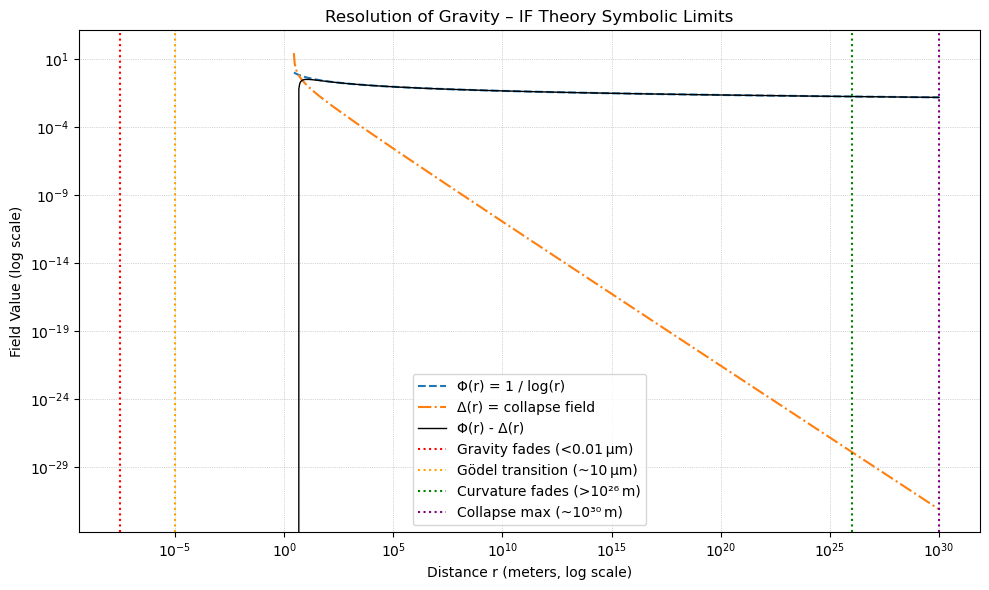

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Define distance range in meters (log-spaced)
r = np.logspace(-8, 30, 1000)
# Remove invalid regions (log(log r) undefined when r < e)
r = r[r > np.exp(1.001)]  # ~ r > 2.73


# Define curvature (Φ) and collapse (Δ) fields
phi = 1 / np.log(r)
delta = 1.2 / ((np.log(np.log(r)))**1.1 * r**1.05)

# Compute difference
diff = phi - delta

# Convert lower threshold to microns
r_disappear_m = 3e-8          # ~0.03 μm, symbolic recursion failure
r_transition_m = 1e-5         # ~10 μm, Gödel saturation begins
r_upper_flat = 1e26           # ~Curvature fades (dark energy)
r_max_saturation = 1e30       # Collapse saturates curvature

# Plot
plt.figure(figsize=(10, 6))
plt.plot(r, phi, label='Φ(r) = 1 / log(r)', linestyle='--')
plt.plot(r, delta, label='Δ(r) = collapse field', linestyle='-.')
plt.plot(r, diff, label='Φ(r) - Δ(r)', color='black', linewidth=1)

# Annotate symbolic boundaries
plt.axvline(x=r_disappear_m, color='red', linestyle=':', label='Gravity fades (<0.01 μm)')
plt.axvline(x=r_transition_m, color='orange', linestyle=':', label='Gödel transition (~10 μm)')
plt.axvline(x=r_upper_flat, color='green', linestyle=':', label='Curvature fades (>10²⁶ m)')
plt.axvline(x=r_max_saturation, color='purple', linestyle=':', label='Collapse max (~10³⁰ m)')

# Log-log scale
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Distance r (meters, log scale)")
plt.ylabel("Field Value (log scale)")
plt.title("Resolution of Gravity – IF Theory Symbolic Limits")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


## Final Output Summary

In [34]:
print(f"🔬 Gravity disappears below ≈ {r_disappear_um:.2f} μm")
print(f"🧠 Gravity saturates beyond ≈ {r_peak:.2e} meters")
print(f"🚩 Max symbolic gravity occurs at r = {r_peak:.2e} meters")
print(f"📈 At that point: Φ(r) - Δ(r) = {contrast_peak:.4f}")


🔬 Gravity disappears below ≈ 0.01 μm
🧠 Gravity saturates beyond ≈ 1.00e+30 meters
🚩 Max symbolic gravity occurs at r = 1.00e+30 meters
📈 At that point: Φ(r) - Δ(r) = -69.0776
